In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# train=pd.read_csv("train_bike.csv", parse_dates=['datetime'])
# test=pd.read_csv("test_bike.csv", parse_dates=['datetime'])

train=pd.read_csv("train_bike.csv")
test=pd.read_csv("test_bike.csv")

In [3]:
train.shape #(10886, 12)
test.shape #(6493, 9) 3개컬럼, registered, casual, count 3개 열이 누락

(6493, 9)

In [4]:
df=train.copy()
test_df=test.copy() #사본 생성

In [5]:
df.head()
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [114]:
!pip install missingno

In [115]:
import missingno as msno

<AxesSubplot:>

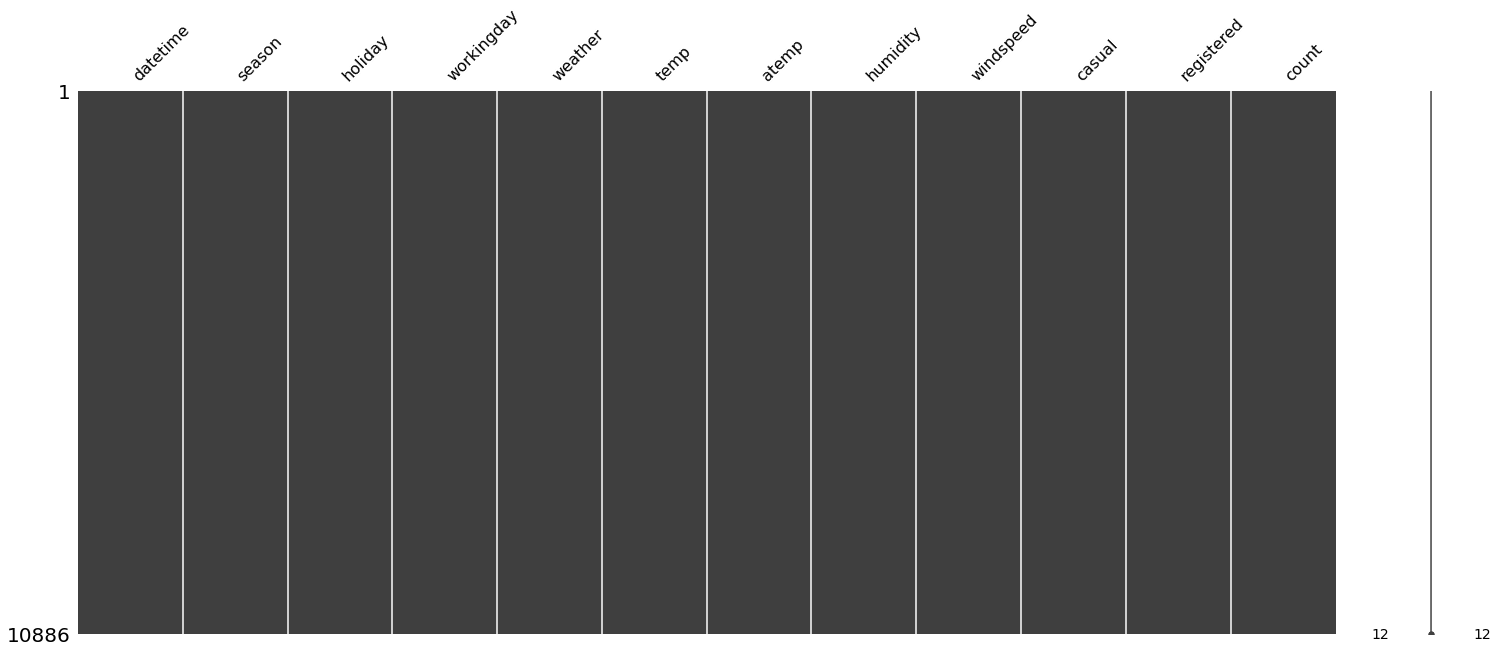

In [116]:
msno.matrix(df)

In [117]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


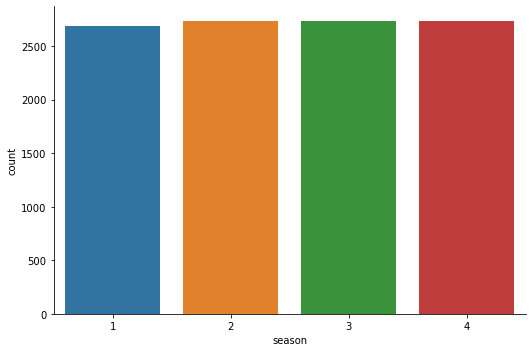

In [21]:
sns.factorplot(x='season', data=df, kind='count', aspect=1.5)

C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


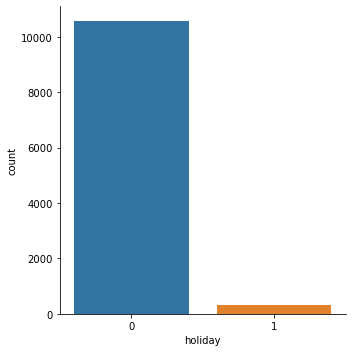

In [27]:
#휴일
df.holiday.value_counts()
sns.factorplot(x='holiday', data=df, kind='count', aspect=1)


C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


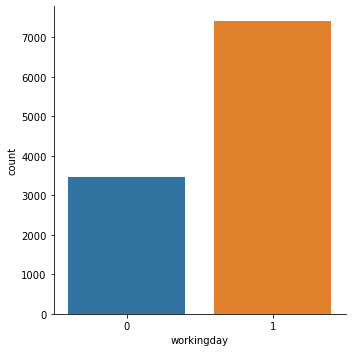

In [30]:
df.workingday.value_counts()
sns.factorplot(x='workingday', data=df, kind='count', aspect=1)


C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


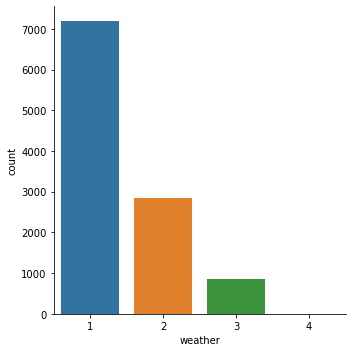

In [33]:
df.weather.value_counts()
sns.factorplot(x='weather', data=df, kind='count', aspect=1)


In [35]:
df.describe()
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

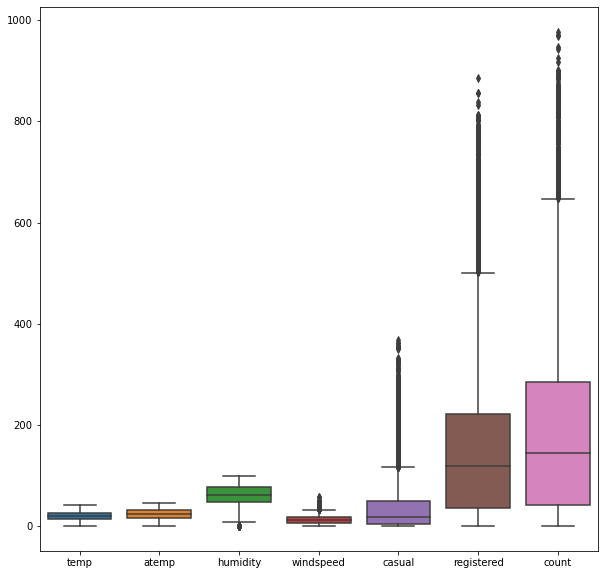

In [40]:
sns.boxplot(data=df[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf() #현재 출력된 figure의 번호를 추출
fig.set_size_inches(10,10)

In [43]:
df.temp.unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

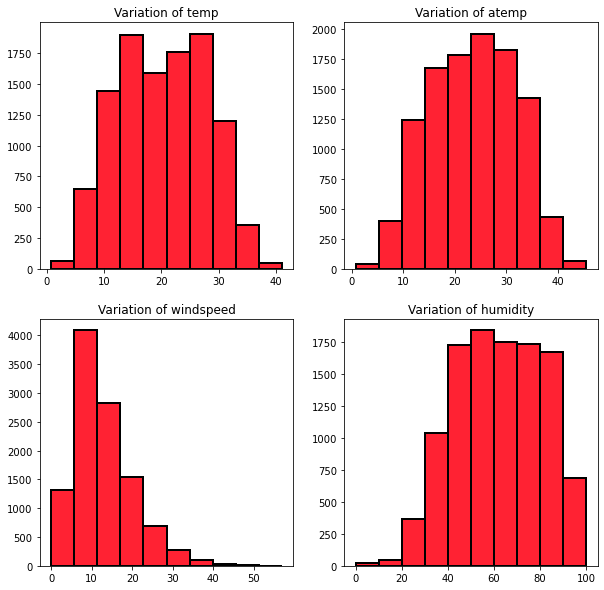

In [53]:
fig, axes=plt.subplots(2,2)
axes[0,0].hist(x='temp', data=df, edgecolor="black", color="#ff2233", linewidth=2)
axes[0,0].set_title("Variation of temp")

axes[0,1].hist(x='atemp', data=df, edgecolor="black", color="#ff2233", linewidth=2)
axes[0,1].set_title("Variation of atemp")

axes[1,0].hist(x='windspeed', data=df, edgecolor="black", color="#ff2233", linewidth=2)
axes[1,0].set_title("Variation of windspeed")

axes[1,1].hist(x='humidity', data=df, edgecolor="black", color="#ff2233", linewidth=2)
axes[1,1].set_title("Variation of humidity")

fig.set_size_inches(10,10)

In [8]:
cor_mat=df[:].corr()
type(cor_mat)

pandas.core.frame.DataFrame

In [9]:
import numpy as np

<AxesSubplot:>

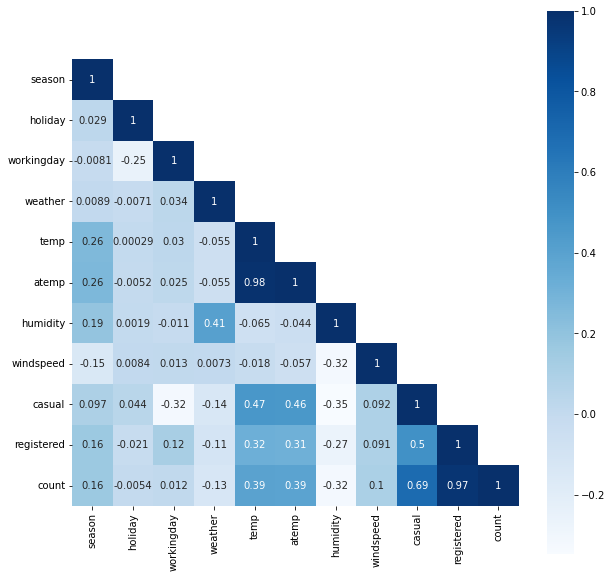

In [10]:
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

#fig.set_size_inches(10,10)
plt.figure(figsize=(10,10))
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True,
           cmap='Blues', annot_kws={"size":10}, mask=mask)#, vmin=0, vmax=1

<AxesSubplot:>

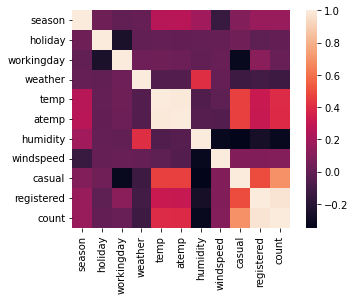

In [91]:
# df['datetime'].dt.year
# 연/월/일/dayofweek
# df/test_df 에 대해 추출

# df['datetime'].dt.month
# df['datetime'].dt.day
# df['datetime'].dt.dayofweek

# test_df['datetime'].dt.month
# test_df['datetime'].dt.day
# test_df['datetime'].dt.dayofweek #0~6, 0:월요일~6:일요일


0       3
1       3
2       3
3       3
4       3
       ..
6488    0
6489    0
6490    0
6491    0
6492    0
Name: datetime, Length: 6493, dtype: int64

In [12]:
df['season'] #1= 봄 +1 => 여름(2) + 1 => 가을
# 봄(1)  =1000
# 여름(2)=0100 
# 가을(3)=0010
# 겨울(4)=0001
season=pd.get_dummies(df['season'], prefix='season')

In [13]:
season
df
df=pd.concat([df, season], axis=1)

In [123]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [14]:
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [15]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)

In [16]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [17]:
df.drop(['season', 'weather'], inplace=True, axis=1)

In [18]:
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [19]:
test_df.drop(['season', 'weather'], inplace=True, axis=1)

In [20]:
test_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [21]:
df.datetime
df['hour']=[t.hour for t in pd.DatetimeIndex(df.datetime)]
df['day']=[t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df['month']=[t.month for t in pd.DatetimeIndex(df.datetime)]
df['year']=[t.year for t in pd.DatetimeIndex(df.datetime)]

In [22]:
df['year']  #2011 -> 0, 2012 -> 1
#map함수
df['year']-2011
df.apply(lambda x : 0 if x['year']==2011 else 1 if x['year']==2012 
         else x['year'],axis=1)

df['year']=df['year'].map({2011:0, 2012:1})

In [23]:
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,4,5,1,0


In [24]:
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})

In [25]:
df.head()
df.drop('datetime', axis=1, inplace=True)

<AxesSubplot:>

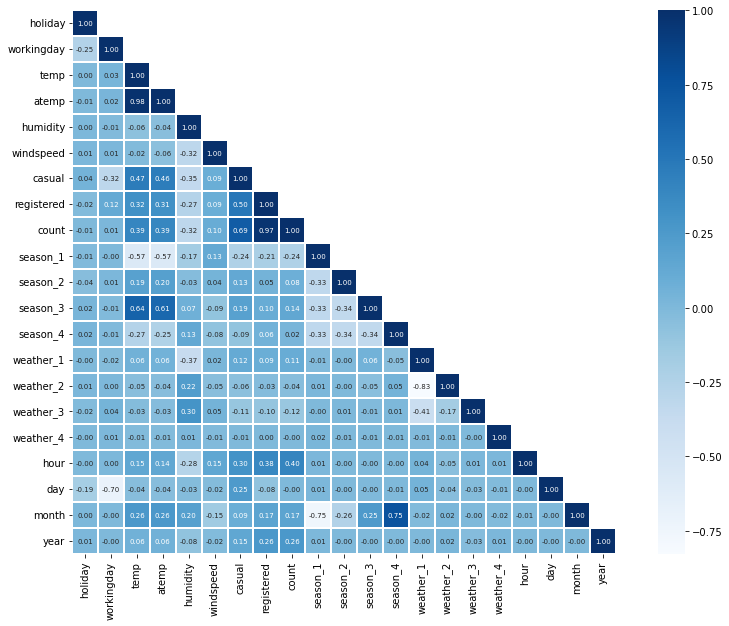

In [26]:
cor_mat=df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

#fig.set_size_inches(10,10)
plt.figure(figsize=(15,10))
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True,
           cmap='Blues',fmt=".2f",linewidths=2, annot_kws={"size":7}, mask=mask)

In [27]:
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [28]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


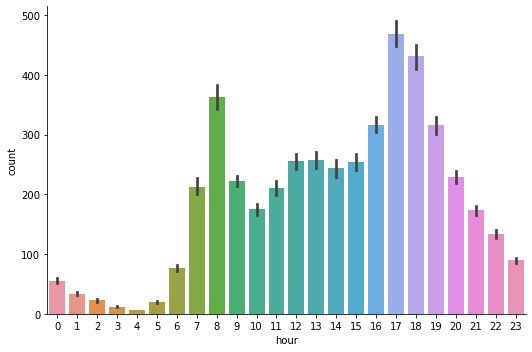

In [29]:
sns.factorplot(x="hour", y="count", data=df, kind='bar', aspect=1.5)
#7-8, 16-19시에 이용객이 많음

C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


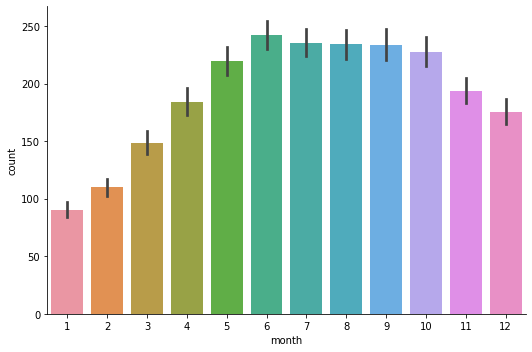

In [30]:
sns.factorplot(x="month", y="count", data=df, kind='bar', aspect=1.5)
#계절 -> count에 영향
#month(월)->계절->count예측


C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


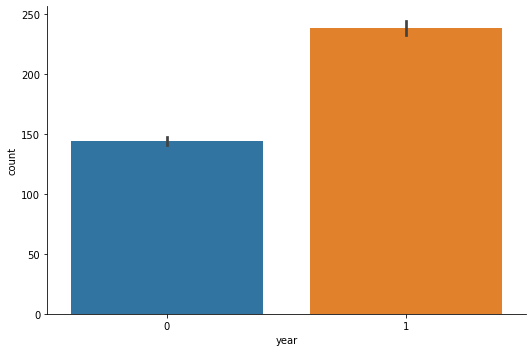

In [31]:
sns.factorplot(x="year", y="count", data=df, kind='bar', aspect=1.5)


In [32]:
df['day']

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: day, Length: 10886, dtype: int64

C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


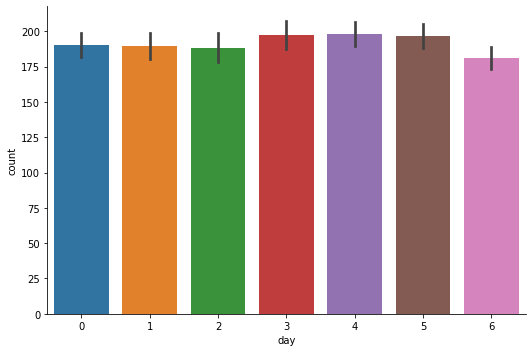

In [163]:
sns.factorplot(x="day", y="count", data=df, kind='bar', aspect=1.5)


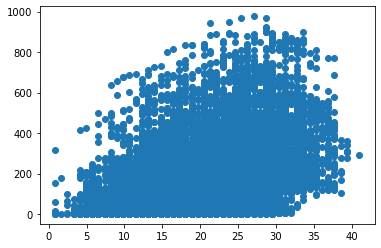

In [165]:
plt.scatter(x='temp', y='count' , data=df )

In [33]:
new_df=df.copy()

In [34]:
new_df

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0000,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0000,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0000,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0000,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0000,1,1,0,0,0,1,0,0,0,4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,0,0,0,1,1,0,0,0,19,2,12,1
10882,0,1,14.76,17.425,57,15.0013,241,0,0,0,1,1,0,0,0,20,2,12,1
10883,0,1,13.94,15.910,61,15.0013,168,0,0,0,1,1,0,0,0,21,2,12,1
10884,0,1,13.94,17.425,61,6.0032,129,0,0,0,1,1,0,0,0,22,2,12,1


In [35]:
new_df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,191.574132,0.246739,0.251056,0.251056,0.251148,0.660665,0.260334,0.078909,0.000092,11.541613,3.013963,6.521495,0.501929
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,181.144454,0.431133,0.433641,0.433641,0.433694,0.473505,0.438837,0.269609,0.009584,6.915838,2.004585,3.444373,0.500019
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,4.000000,0.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,3.000000,7.000000,1.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,284.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000,5.000000,10.000000,1.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,6.000000,12.000000,1.000000


In [36]:
new_df['temp_bin']=np.floor(new_df['temp'])//5 #소수점 이하 절삭

In [37]:
new_df['temp_bin'].unique()

array([1., 2., 3., 0., 4., 5., 6., 7., 8.])

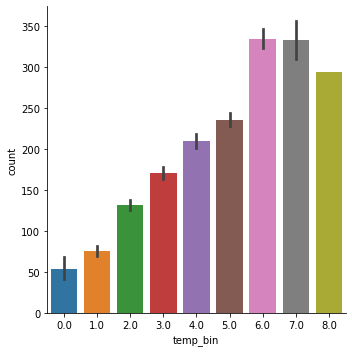

In [180]:
sns.factorplot(x='temp_bin', y='count',data=new_df,  kind='bar')

In [184]:
df.columns.to_series().groupby(df.dtypes).groups

{uint8: ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'], int64: ['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month', 'year'], float64: ['temp', 'atemp', 'windspeed']}

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   atemp       10886 non-null  float64
 4   humidity    10886 non-null  int64  
 5   windspeed   10886 non-null  float64
 6   count       10886 non-null  int64  
 7   season_1    10886 non-null  uint8  
 8   season_2    10886 non-null  uint8  
 9   season_3    10886 non-null  uint8  
 10  season_4    10886 non-null  uint8  
 11  weather_1   10886 non-null  uint8  
 12  weather_2   10886 non-null  uint8  
 13  weather_3   10886 non-null  uint8  
 14  weather_4   10886 non-null  uint8  
 15  hour        10886 non-null  int64  
 16  day         10886 non-null  int64  
 17  month       10886 non-null  int64  
 18  year        10886 non-null  int64  
dtypes: float64(3), int64(8), 

In [186]:
#머신러닝을 이용한 예측 모델 생성(내일 제출)

In [ ]:
aihub

In [39]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [40]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [48]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

In [49]:
models=[RandomForestRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor', 'KNeighborsRegressor'],
 'RMSLE': [0.3208094045004565, 0.8603155168503474]}